In [2]:
import numpy as np
import matplotlib.pyplot as plt
import stan
import arviz as az

# stan problems
import nest_asyncio
nest_asyncio.apply()

np.random.seed(42)
N = 100
alpha = 2.3
beta = 4.0
sigma = 2.0
x = np.random.normal(size=N)
y = alpha + beta * x + sigma * np.random.normal(size=N)

In [7]:
mu_0 = 3
sigma_0 = 3
sample_mean = np.mean(y)
n = N

# posterior
sigma_sq = sigma ** 2
sigma_0_sq = sigma_0 ** 2

mu_post = ((n / sigma_sq) * sample_mean + (1 / sigma_0_sq) * mu_0) / (n / sigma_sq + 1 / sigma_0_sq)
sigma_post_sq = 1 / (n / sigma_sq + 1 / sigma_0_sq)
sigma_post = np.sqrt(sigma_post_sq)

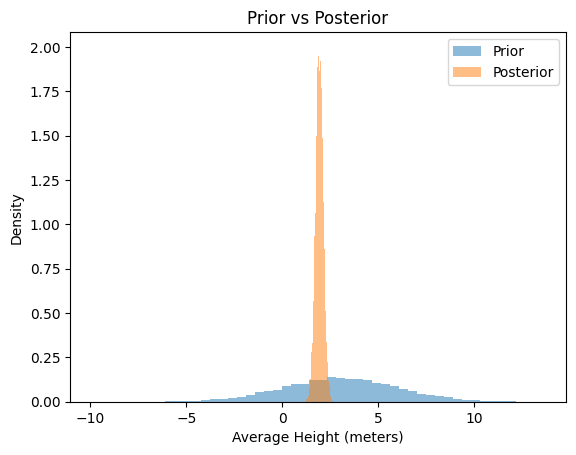

In [9]:
prior_samples = np.random.normal(mu_0, sigma_0, 10000)
posterior_samples = np.random.normal(mu_post, sigma_post, 10000)

plt.hist(prior_samples, bins=50, density=True, alpha=0.5, label='Prior')
plt.hist(posterior_samples, bins=50, density=True, alpha=0.5, label='Posterior')

plt.legend()
plt.xlabel('Average Height (meters)')
plt.ylabel('Density')
plt.title('Prior vs Posterior')
plt.savefig('Q5.png')
plt.show()

In [ ]:
stanCode = """
data {
  int<lower=0> N;  // observations
  vector[N] x;     // predictor
  vector[N] y;     // response
}
parameters {
  real alpha;      // intercept
  real beta;       // slope
  real<lower=0> sigma;  // noise standard deviation
}
model {
  sigma ~ inv_gamma(1, 1);   // noise
  alpha ~ normal(0, 10);     // intercept
  beta ~ normal(0, 10);      // slope
  y ~ normal(alpha + beta * x, sigma);
}
"""

data = {
    'N': N,
    'x': x,
    'y': y
}

In [6]:
model = stan.build(stanCode, data=data)
fit = model.sample(num_samples=2000, num_chains=4)

az.summary(az.from_pystan(fit))

Building...



Building: found in cache, done.Sampling:   0%
Sampling:  25% (3000/12000)
Sampling:  50% (6000/12000)
Sampling:  75% (9000/12000)
Sampling: 100% (12000/12000)
Sampling: 100% (12000/12000), done.
Messages received during sampling:
  Gradient evaluation took 4.2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.42 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/tmp/httpstan_lipc1ba5/model_oj7ef663.stan', line 16, column 2 to column 38)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Gradient evaluation took 2.8e-05 seconds
  1000 transitions using 10 leapfrog steps per tran

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,2.315,0.193,1.946,2.672,0.002,0.002,7672.0,5912.0,1.0
beta,3.716,0.214,3.305,4.108,0.003,0.002,6876.0,5564.0,1.0
sigma,1.910,0.140,1.662,2.175,0.002,0.002,7423.0,5615.0,1.0
